1.0 0.8531468531468531


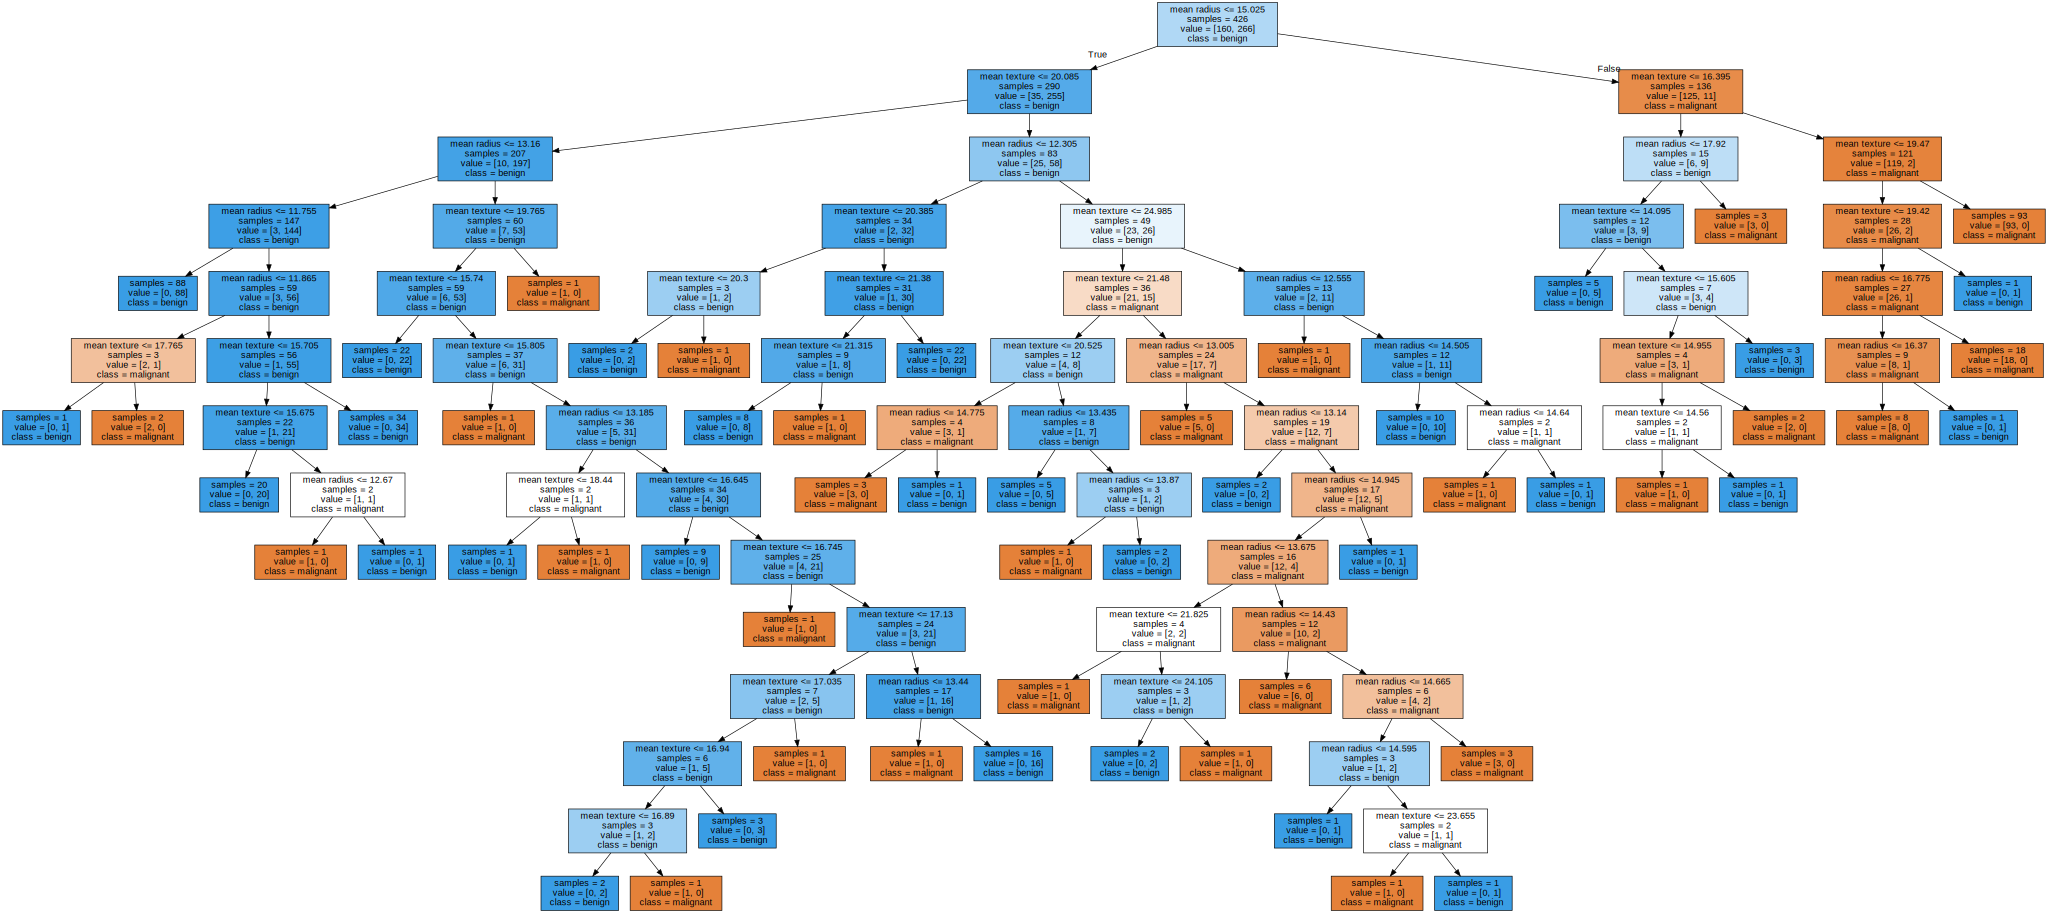

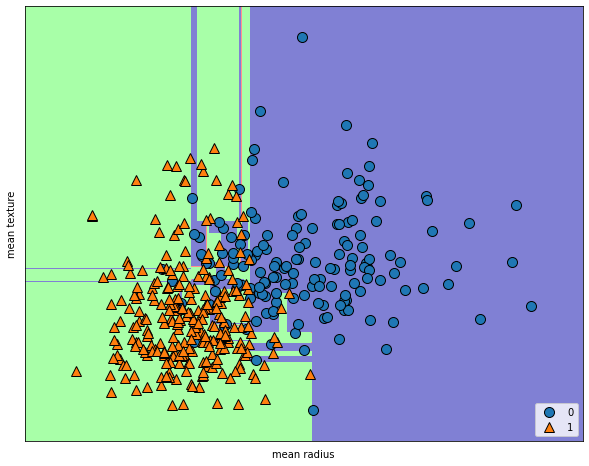

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

X_train = X_train[:, :2]
X_test = X_test[:, :2]

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score  = model.score(X_test, y_test)
print(train_score, test_score)

import mglearn

plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X_train, alpha=0.5)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.legend(loc=4)

from sklearn.tree import export_graphviz

export_graphviz(model, out_file='tree.dot', class_names=cancer.target_names,
                feature_names=cancer.feature_names[:2], impurity=False, filled=True)
                
import graphviz

with open('tree.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))